# TP DE PYTHON AVANCE ELABORE PAR CT GIPOY MULENDA RODRIGUE DIRIGE PAR LE PROF MASAKUNA FELICIEN

# Enoncé
python : Analyse des sentiments sur les réseaux sociaux utilisation de données de medias sociaux pour analyser les tendances et les sentiments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package vader_lexicon to C:\Users\ELIE
[nltk_data]     WEB\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\ELIE
[nltk_data]     WEB\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\ELIE
[nltk_data]     WEB\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df = pd.read_csv('sentimentdataset.csv')
df

,Unnamed: 0,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [3]:
df.duplicated().sum()

0

In [4]:
def count_distinct_value():
    for column in df.columns:
        num_distinct_values = len(df[column].unique())
        print(f"{column}: {num_distinct_values} distinct values")


count_distinct_value()

Unnamed: 0: 732 distinct values
Unnamed: 0.1: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [5]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [6]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [7]:
df['Platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

In [8]:
df["Country"].value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64

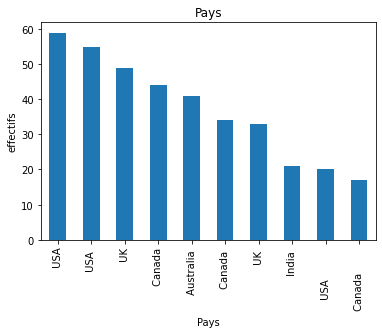

In [9]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Pays')
plt.xlabel('Pays')
plt.ylabel('effectifs')
plt.show()

In [10]:
# Aggregation de pays
df['Country'] = df['Country'].str.strip()

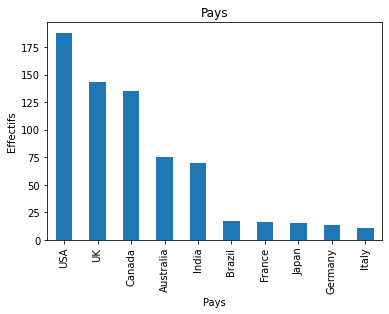

In [11]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Pays')
plt.xlabel('Pays')
plt.ylabel('Effectifs')
plt.show()

In [12]:
# Conversion de la colonne 'Timestamp' en datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Analyse temporelle
df['Hour'] = df['Timestamp'].dt.hour

map_mois = {
    1: 'Janvier',
    2: 'Fevrier',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Decembre'
}
df['Month'] = df['Month'].map(map_mois)

df['Month'] = df['Month'].astype('object')

In [13]:
df_test = df.copy()

def categorize_sentiment(sentiment):
    positive_sentiments = ['Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe',
                           'Surprise', 'Acceptance', 'Adoration', 'Anticipation', 'Calmness', 'Excitement',
                           'Kind', 'Pride', 'Shame', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude',
                           'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
                           'Fulfillment', 'Reverence', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate',
                           'Playful', 'Free-spirited', 'Inspired', 'Confident']
    negative_sentiments = ['Anger', 'Fear', 'Sadness', 'Disgust', 'Bitter', 'Confusion', 'Despair', 'Grief',
                           'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
                           'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Hate', 'Bad', 'Fearful','Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious',
                           'Dismissive', 'Nervous', 'Worried', 'Tense', 'Stressed', 'Depressed', 'Miserable',
                           'Lonely', 'Insecure', 'Guilty', 'Embarrassed', 'Mischievous', 'Sad']
    
    if sentiment.strip() in positive_sentiments:
        return 'Positive'
    elif sentiment.strip() in negative_sentiments:
        return 'Negative'
    else:
        return 'Neutral'

# Appliquer la fonction de regroupement sur la colonne des sentiments
df_test['Sentiment_Category'] = df_test['Sentiment'].apply(categorize_sentiment)
# Création de colonnes pour indiquer si le sentiment est positif, négatif ou neutre
df_test['Positive'] = df_test['Sentiment_Category'] == 'Positive'
df_test['Negative'] = df_test['Sentiment_Category'] == 'Negative'
df_test['Neutral'] = df_test['Sentiment_Category'] == 'Neutral'

df_test.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Category,Positive,Negative,Neutral
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,Janvier,15,12,Neutral,False,False,True
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,Janvier,15,8,Neutral,False,False,True
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,Janvier,15,15,Neutral,False,False,True
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,Janvier,15,18,Neutral,False,False,True
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,Janvier,15,19,Neutral,False,False,True


In [14]:
# Utilisation de PorterStemer et le stopwords des extensions de NLTK pour retirer les charactères 
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text


In [15]:
df["Clean_Text"] = df["Text"]

In [16]:
colonne_special= ['Platform','Country', 'Year','Month','Day']

for col in colonne_special:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')  

Total unique values for Platform: 4
 Instagram : 258
 Facebook : 231
 Twitter : 128
 Twitter  : 115


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Sweden: 2
Colombia: 1
Scotland: 1
Kenya: 1
Jamaica: 1
Ireland: 1
China: 1
Norway: 1
Cambodia: 1
Maldives: 1
Peru: 1
Jordan: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2012: 4
2013: 4
2014: 4
2010: 3


Total unique values for Month: 12
Fevrier: 85
Janvier: 82
Août: 78
Septembre: 77
Juin: 71
Juillet: 62
Avril: 51
Novembre: 49
Octobre: 48
Mai: 46
Mars: 44
Decembre: 39


Total unique values for Day: 31
15: 73
10: 63
28: 59
18: 49
5: 48
20: 39
22: 39
12: 38
8: 34
2: 27
1: 26
30: 23
25: 23
3: 21
17: 17
19: 14
14: 13
27: 12
11: 11
2

In [17]:
# Separation de l'analyse dans une copy de du jeux de donnée acutel
df_sentiment = df.copy()

analyzer = SentimentIntensityAnalyzer()

df_sentiment['Vader_Score'] = df_sentiment['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df_sentiment['Sentiment'] = df_sentiment['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df_sentiment[['Clean_Text', 'Vader_Score', 'Sentiment']].head(10))

                                          Clean_Text  Vader_Score Sentiment
0   Enjoying a beautiful day at the park!        ...       0.8221  positive
1   Traffic was terrible this morning.           ...      -0.4767  negative
2   Just finished an amazing workout! 💪          ...       0.6239  positive
3   Excited about the upcoming weekend getaway!  ...       0.4003  positive
4   Trying out a new recipe for dinner tonight.  ...       0.0000   neutral
5   Feeling grateful for the little things in lif...       0.5423  positive
6   Rainy days call for cozy blankets and hot coc...      -0.0772  negative
7   The new movie release is a must-watch!       ...       0.0000   neutral
8   Political discussions heating up on the timel...       0.0000   neutral
9   Missing summer vibes and beach days.         ...      -0.2960  negative


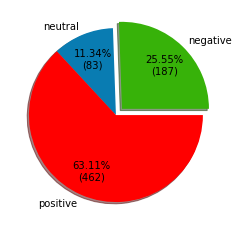

In [18]:
# Repartition Proportionnelle des sentiments 
colors = ['#37B209', '#097CB2', '#FF0000']

explode = (0.1, 0, 0)  

sentiment_counts = df_sentiment.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=1),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

In [19]:
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)
ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

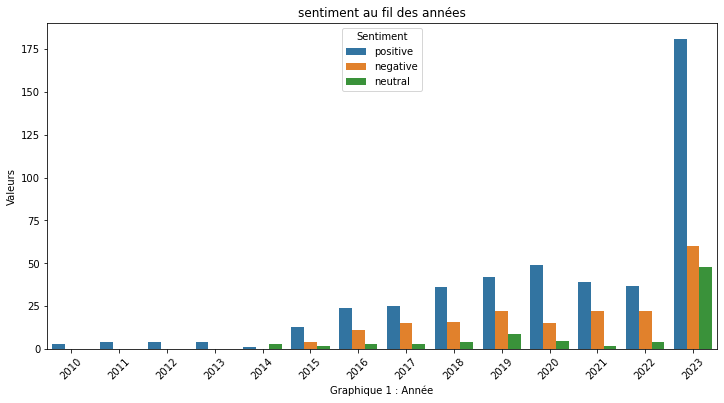

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df_sentiment)
plt.title('sentiment au fil des années')
plt.xlabel('Graphique 1 : Année')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.show()

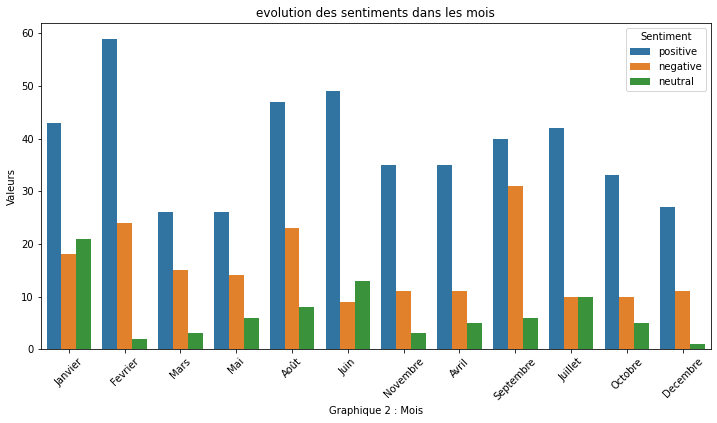

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df_sentiment)
plt.title('evolution des sentiments dans les mois')
plt.xlabel('Graphique 2 : Mois')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.show()

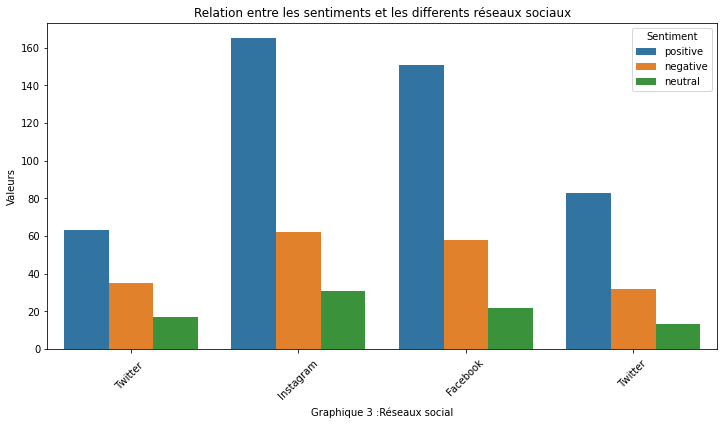

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df_sentiment)
plt.title('Relation entre les sentiments et les differents réseaux sociaux')
plt.xlabel('Graphique 3 :Réseaux social')
plt.ylabel('Valeurs')
plt.xticks(rotation=45)
plt.show()

CONCLUSION

Par rapport au données à notre disposition , nous pouvons observer à travers le Graphique 1, que les sentiments positives sur le media sociaux reste largement superieur au fil des années avec une montée remarquable en 2023. La même observation est faite dans les mois des années. Le graphique 3 montre egalement une expression positive des internautes d'instagram avec une tendance de plus en plus croissante d'utilisation du media sacial animé d'un sentiment positive . 

In [23]:
import nbformat

In [24]:
with open('TP_PYTHON_Analyse_Sentiment.ipynb', 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

In [25]:
text_content = ""
for cell in notebook.cells:
    if cell.cell_type == 'code':
        text_content += f"### CODE CELL ###\n{cell.source}\n\n"
    elif cell.cell_type == 'markdown':
        text_content += f"### MARKDOWN CELL ###\n{cell.source}\n\n"

In [26]:
with open('TP_PYTHON_Analyse_Sentiment.txt', 'w', encoding='utf-8') as f:
    f.write(text_content)

In [27]:
print("Le contenu du notebook a été extrait avec succès dans le fichier 'TP_PYTHON_Analyse_Sentiment.txt'.")

Le contenu du notebook a été extrait avec succès dans le fichier 'TP_PYTHON_Analyse_Sentiment.txt'.
